In [5]:
import pandas as pd
import logging

# Logger sozlamalari
logging.basicConfig(
    filename=r"C:\Users\Rasulbek_Ruzmetov\Desktop\SML_R_Project\Log\feature_selection.log",
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s"
)

try:
    # CSV faylini o'qish
    df = pd.read_csv(r"C:\Users\Rasulbek_Ruzmetov\Desktop\SML_R_Project\Data\Preprocessing_Data\ML_After_Skewness.csv")
    logging.info("Fayl muvaffaqiyatli yuklandi: ML_After_Skewness.csv")
    logging.info(f"DataFrame o'lchami: {df.shape}")
    logging.info(f"DataFrame ustunlari: {df.columns.tolist()}")
except Exception as e:
    logging.error(f"Fayl yuklashda xato yuz berdi: {e}")

In [6]:
df.describe()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_per_hour,is_remote,is_large_company
count,4.144000e+03,4.144000e+03,4144.000000,4144.0,3836.000000,4144.000000,2668.000000,4144.000000,4.144000e+03,4144.000000,4144.000000,2668.000000,4.144000e+03,4.144000e+03
mean,3.292090e-16,3.772186e-16,1.996622,0.0,-0.198583,8.860521,0.044640,31.226593,9.601929e-17,30.305502,0.989382,0.044640,8.230225e-17,8.230225e-17
std,1.000121e+00,1.000121e+00,0.085028,0.0,0.553220,0.890232,0.616983,6.252708,1.000121e+00,6.003443,0.165540,0.616983,1.000121e+00,1.000121e+00
min,-1.598702e+00,-1.726322e+00,0.000000,0.0,-3.564228,0.000000,-7.060083,0.000000,-4.949943e-01,0.000000,0.000000,-7.060083,-4.887371e-01,-1.394066e-01
25%,-1.545044e+00,-1.703548e+00,2.000000,0.0,-0.426647,9.000000,-0.084611,33.000000,-4.949943e-01,32.000000,1.000000,-0.084611,-4.887371e-01,-1.394066e-01
50%,6.451721e-01,5.851459e-01,2.000000,0.0,-0.045594,9.000000,0.227128,33.000000,-4.949943e-01,32.000000,1.000000,0.227128,-4.887371e-01,-1.394066e-01
75%,6.451721e-01,5.851459e-01,2.000000,0.0,0.167756,9.000000,0.414593,33.000000,-4.949943e-01,32.000000,1.000000,0.414593,-4.887371e-01,-1.394066e-01
max,6.451721e-01,5.851459e-01,3.000000,0.0,0.939829,9.000000,0.766946,34.000000,2.037421e+00,33.000000,2.000000,0.766946,2.046090e+00,7.173263e+00


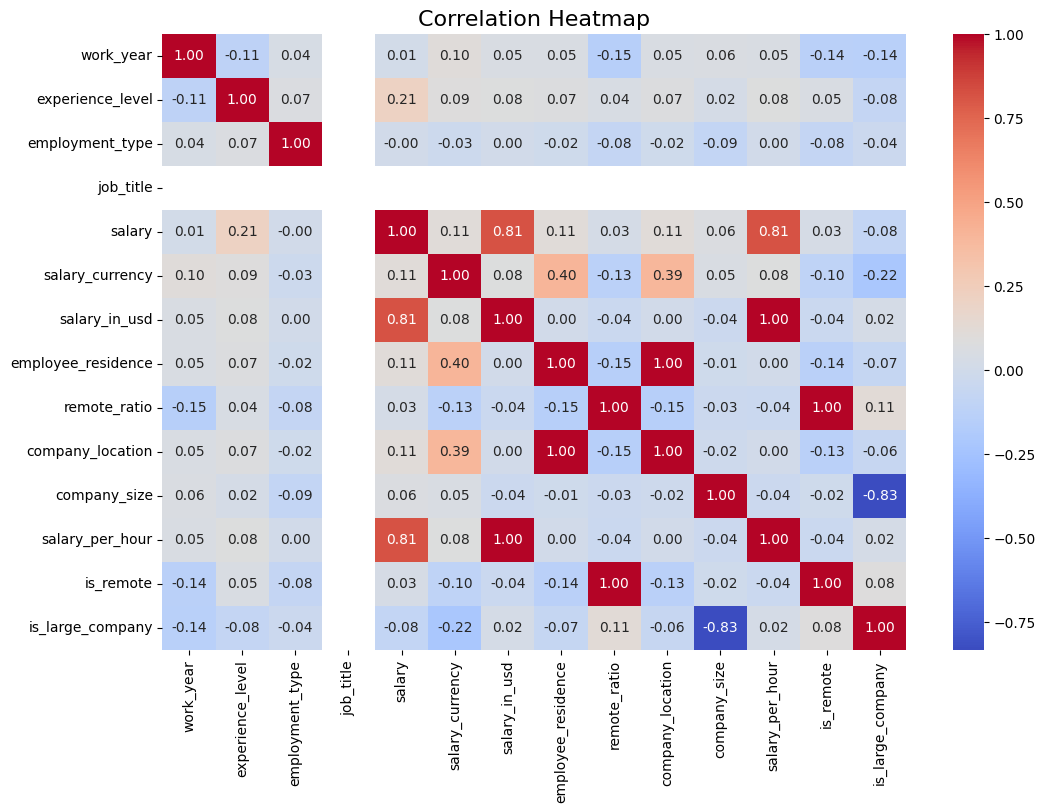

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation jadvalini hisoblash
correlation_matrix = df.corr()

# Heatmap yaratish
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,        # qiymatlarni yozish
    fmt=".2f",         # format
    cmap="coolwarm",   # rang sxemasi
    cbar=True          # rang paneli
)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


In [9]:
import pandas as pd
import numpy as np

# Correlation jadvalini hisoblash
correlation_matrix = df.corr().abs()

# High correlation threshold
high_corr_threshold = 0.8

# Highly correlated ustunlarni topish
high_corr_var = np.where(correlation_matrix > high_corr_threshold)
high_corr_var = [(correlation_matrix.columns[x], correlation_matrix.columns[y]) 
                 for x, y in zip(*high_corr_var) if x != y and x < y]

print("Highly Correlated Columns (Threshold={}):".format(high_corr_threshold))
for col_pair in high_corr_var:
    print(col_pair)


# Low impact ustunlarni aniqlash
# Bu yerda past ta’sirni korrelyatsiya bilan aniqlaymiz (target bilan)
target_column = "salary"  # Target ustun nomi
low_impact_threshold = 0.1

low_impact_columns = correlation_matrix[target_column][
    correlation_matrix[target_column] < low_impact_threshold
].index.tolist()

print("\nLow Impact Columns (Threshold={}):".format(low_impact_threshold))
print(low_impact_columns)


Highly Correlated Columns (Threshold=0.8):
('salary', 'salary_in_usd')
('salary', 'salary_per_hour')
('salary_in_usd', 'salary_per_hour')
('employee_residence', 'company_location')
('remote_ratio', 'is_remote')
('company_size', 'is_large_company')

Low Impact Columns (Threshold=0.1):
['work_year', 'employment_type', 'remote_ratio', 'company_size', 'is_remote', 'is_large_company']


### Highly Correlated Columns (Threshold = 0.8)
- ('salary', 'salary_in_usd')
- ('salary', 'salary_per_hour')
- ('salary_in_usd', 'salary_per_hour')
- ('employee_residence', 'company_location')
- ('remote_ratio', 'is_remote')
- ('company_size', 'is_large_company')

### Low Impact Columns (Threshold = 0.1)
- work_year
- employment_type
- remote_ratio
- company_size
- is_remote
- is_large_company


In [13]:
import pandas as pd
import numpy as np

# Correlation jadvalini hisoblash
correlation_matrix = df.corr().abs()

# 1. Highly correlated ustunlarni aniqlash
high_corr_threshold = 0.95
high_corr_var = np.where(correlation_matrix > high_corr_threshold)
high_corr_cols = set()
high_corr_pairs = []

for x, y in zip(*high_corr_var):
    if x != y and x < y:
        col_to_remove = correlation_matrix.columns[y]
        high_corr_cols.add(col_to_remove)
        high_corr_pairs.append((correlation_matrix.columns[x], correlation_matrix.columns[y], correlation_matrix.iloc[x, y]))

# 2. Low impact ustunlarni aniqlash
target_column = "salary"  # Target ustun nomi
low_impact_threshold = 0.01
low_impact_cols = correlation_matrix[target_column][
    correlation_matrix[target_column] < low_impact_threshold
].index.tolist()

# 3. Jadval tayyorlash
results = []

for col1, col2, corr_value in high_corr_pairs:
    results.append({"Column": col2, "Reason": f"Highly Correlated with {col1}", "Correlation": corr_value})

for col in low_impact_cols:
    results.append({"Column": col, "Reason": "Low Impact", "Correlation": correlation_matrix.loc[col, target_column]})

results_df = pd.DataFrame(results)

# 4. Ustunlarni olib tashlash
cols_to_drop = list(high_corr_cols) + low_impact_cols
df_filtered = df.drop(columns=cols_to_drop)

# Natijalarni chiqarish
print("\nRemoved Columns Table:")
print(results_df)

print(f"\nOriginal DataFrame shape: {df.shape}")
print(f"Filtered DataFrame shape: {df_filtered.shape}")



Removed Columns Table:
             Column                                     Reason  Correlation
0   salary_per_hour       Highly Correlated with salary_in_usd     1.000000
1  company_location  Highly Correlated with employee_residence     0.998515
2         is_remote        Highly Correlated with remote_ratio     0.995763
3   employment_type                                 Low Impact     0.000181

Original DataFrame shape: (4144, 14)
Filtered DataFrame shape: (4144, 10)


In [14]:
df_filtered.to_csv(r"C:\Users\Rasulbek_Ruzmetov\Desktop\SML_R_Project\Data\Feature_Selection\Feature_Selection.csv")